# Neural Network with Two Layers

Welcome to your week three programming assignment. You are ready to build a neural network with two layers and train it to solve a classification problem. 

**After this assignment, you will be able to:**

- Implement a neural network with two layers to a classification problem
- Implement forward propagation using matrix multiplication
- Perform backward propagation

# Table of Contents

- [ 1 - Classification Problem](#1)
- [ 2 - Neural Network Model with Two Layers](#2)
  - [ 2.1 - Neural Network Model with Two Layers for a Single Training Example](#2.1)
  - [ 2.2 - Neural Network Model with Two Layers for Multiple Training Examples](#2.2)
  - [ 2.3 - Cost Function and Training](#2.3)
  - [ 2.4 - Dataset](#2.4)
  - [ 2.5 - Define Activation Function](#2.5)
    - [ Exercise 1](#ex01)
- [ 3 - Implementation of the Neural Network Model with Two Layers](#3)
  - [ 3.1 - Defining the Neural Network Structure](#3.1)
    - [ Exercise 2](#ex02)
  - [ 3.2 - Initialize the Model's Parameters](#3.2)
    - [ Exercise 3](#ex03)
  - [ 3.3 - The Loop](#3.3)
    - [ Exercise 4](#ex04)
    - [ Exercise 5](#ex05)
    - [ Exercise 6](#ex06)
  - [ 3.4 - Integrate parts 3.1, 3.2 and 3.3 in nn_model()](#3.4)
    - [ Exercise 7](#ex07)
    - [ Exercise 8](#ex08)
- [ 4 - Optional: Other Dataset](#4)

## Packages

First, import all the packages you will need during this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

Load the unit tests defined for this notebook.

In [2]:
import w3_unittest

<a name='1'></a>
## 1 - Classification Problem

In one of the labs this week, you trained a neural network with a single perceptron, performing forward and backward propagation. That simple structure was enough to solve a "linear" classification problem - finding a straight line in a plane that would serve as a decision boundary to separate two classes.

Imagine that now you have a more complicated problem: you still have two classes, but one line will not be enough to separate them.

[]

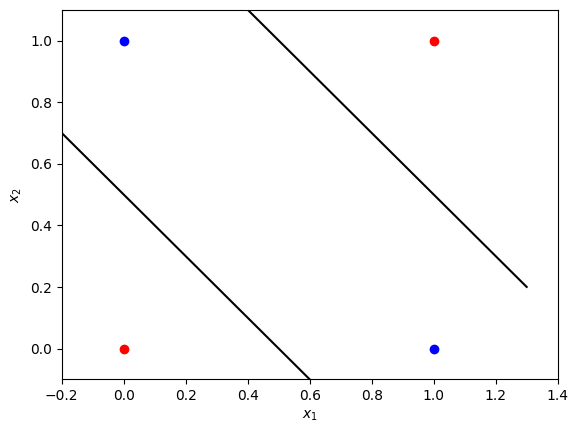

In [3]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Example of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, -1 * x_line + 1.5, color="black")
ax.plot(x_line, -1 * x_line + 0.5, color="black")
plt.plot()

This logic can appear in many applications. For example, if you train a model to predict whether you should buy a house knowing its size and the year it was built. A big new house will not be affordable, while a small old house will not be worth buying. So, you might be interested in either a big old house, or a small new house.

The one perceptron neural network is not enough to solve such classification problem. Let's look at how you can adjust that model to find the solution.

In the plot above, two lines can serve as a decision boundary. Your intuition might tell you that you should also increase the number of perceptrons. And that is absolutely right! You need to feed your data points (coordinates $x_1$, $x_2$) into two nodes separately and then unify them somehow with another one to make a decision. 

Now let's figure out the details, build and train your first multi-layer neural network!

<a name='2'></a>
## 2 - Neural Network Model with Two Layers

<a name='2.1'></a>
### 2.1 - Neural Network Model with Two Layers for a Single Training Example

<img src="images/nn_model_2_layers.png" style="width:1000px;">

The input and output layers of the neural network are the same as for one perceptron model, but there is a **hidden layer** now in between them. The training examples $x^{(i)}=\begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\end{bmatrix}$ from the input layer of size $n_x = 2$ are first fed into the hidden layer of size $n_h = 2$. They are simultaneously fed into the first perceptron with weights $W_1^{[1]}=\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]}\end{bmatrix}$, bias  $b_1^{[1]}$; and into the second perceptron with weights $W_2^{[1]}=\begin{bmatrix}w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$, bias $b_2^{[1]}$. The integer in the square brackets $^{[1]}$ denotes the layer number, because there are two layers now with their own parameters and outputs, which need to be distinguished. 

\begin{align}
z_1^{[1](i)} &= w_{1,1}^{[1]} x_1^{(i)} + w_{2,1}^{[1]} x_2^{(i)} + b_1^{[1]} = W_1^{[1]}x^{(i)} + b_1^{[1]},\\
z_2^{[1](i)} &= w_{1,2}^{[1]} x_1^{(i)} + w_{2,2}^{[1]} x_2^{(i)} + b_2^{[1]} = W_2^{[1]}x^{(i)} + b_2^{[1]}.\tag{1}
\end{align}

These expressions for one training example $x^{(i)}$ can be rewritten in a matrix form :

$$z^{[1](i)} = W^{[1]} x^{(i)} + b^{[1]},\tag{2}$$

where 

&emsp; &emsp; $z^{[1](i)} = \begin{bmatrix}z_1^{[1](i)} \\ z_2^{[1](i)}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$; 

&emsp; &emsp; $W^{[1]} = \begin{bmatrix}W_1^{[1]} \\ W_2^{[1]}\end{bmatrix} = 
\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]} \\ w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$ is matrix of size $\left(n_h \times n_x\right) = \left(2 \times 2\right)$;

&emsp; &emsp; $b^{[1]} = \begin{bmatrix}b_1^{[1]} \\ b_2^{[1]}\end{bmatrix}$ is vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$.

Next, the hidden layer activation function needs to be applied for each of the elements in the vector $z^{[1](i)}$. Various activation functions can be used here and in this model you will take the sigmoid function $\sigma\left(x\right) = \frac{1}{1 + e^{-x}}$. Remember that its derivative is $\frac{d\sigma}{dx} = \sigma\left(x\right)\left(1-\sigma\left(x\right)\right)$. The output of the hidden layer is a vector of size $\left(n_h \times 1\right) = \left(2 \times 1\right)$:

$$a^{[1](i)} = \sigma\left(z^{[1](i)}\right) = 
\begin{bmatrix}\sigma\left(z_1^{[1](i)}\right) \\ \sigma\left(z_2^{[1](i)}\right)\end{bmatrix}.\tag{3}$$

Then the hidden layer output gets fed into the output layer of size $n_y = 1$. This was covered in the previous lab, the only difference are: $a^{[1](i)}$ is taken instead of $x^{(i)}$ and layer notation $^{[2]}$ appears to identify all parameters and outputs:

$$z^{[2](i)} = w_1^{[2]} a_1^{[1](i)} + w_2^{[2]} a_2^{[1](i)} + b^{[2]}= W^{[2]} a^{[1](i)} + b^{[2]},\tag{4}$$

&emsp; &emsp; $z^{[2](i)}$ and $b^{[2]}$ are scalars for this model, as $\left(n_y \times 1\right) = \left(1 \times 1\right)$; 

&emsp; &emsp; $W^{[2]} = \begin{bmatrix}w_1^{[2]} & w_2^{[2]}\end{bmatrix}$ is vector of size $\left(n_y \times n_h\right) = \left(1 \times 2\right)$.

Finally, the same sigmoid function is used as the output layer activation function:

$$a^{[2](i)} = \sigma\left(z^{[2](i)}\right).\tag{5}$$

Mathematically the two layer neural network model for each training example $x^{(i)}$ can be written with the expressions $(2) - (5)$. Let's rewrite them next to each other for convenience:

\begin{align}
z^{[1](i)} &= W^{[1]} x^{(i)} + b^{[1]},\\
a^{[1](i)} &= \sigma\left(z^{[1](i)}\right),\\
z^{[2](i)} &= W^{[2]} a^{[1](i)} + b^{[2]},\\
a^{[2](i)} &= \sigma\left(z^{[2](i)}\right).\\
\tag{6}
\end{align}

Note, that all of the parameters to be trained in the model are without $^{(i)}$ index - they are independent on the input data.

Finally, the predictions for some example $x^{(i)}$ can be made taking the output $a^{[2](i)}$ and calculating $\hat{y}$ as: $\hat{y} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5, \\ 0 & \mbox{otherwise }. \end{cases}$.

<a name='2.2'></a>
### 2.2 - Neural Network Model with Two Layers for Multiple Training Examples

Similarly to the single perceptron model, $m$ training examples can be organised in a matrix $X$ of a shape ($2 \times m$), putting $x^{(i)}$ into columns. Then the model $(6)$ can be rewritten in terms of matrix multiplications:

\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right),\\
\tag{7}
\end{align}

where $b^{[1]}$ is broadcasted to the matrix of size $\left(n_h \times m\right) = \left(2 \times m\right)$ and $b^{[2]}$ to the vector of size $\left(n_y \times m\right) = \left(1 \times m\right)$. It would be a good exercise for you to have a look at the expressions $(7)$ and check that sizes of the matrices will actually match to perform required multiplications.

You have derived expressions to perform forward propagation. Time to evaluate your model and train it.

<a name='2.3'></a>
### 2.3 - Cost Function and Training

For the evaluation of this simple neural network you can use the same cost function as for the single perceptron case - log loss function. Originally initialized weights were just some random values, now you need to perform training of the model: find such set of parameters $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, that will minimize the cost function.

Like in the previous example of a single perceptron neural network, the cost function can be written as:

$$\mathcal{L}\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) =  \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{[2](i)}\right) - (1-y^{(i)})\log\left(1- a^{[2](i)}\right)  \large  \right), \small\tag{8}$$

where $y^{(i)} \in \{0,1\}$ are the original labels and $a^{[2](i)}$ are the continuous output values of the forward propagation step (elements of array $A^{[2]}$).

To minimize it, you can use gradient descent, updating the parameters with the following expressions:

\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} },\\
\tag{9}
\end{align}

where $\alpha$ is the learning rate.


To perform training of the model you need to calculate now $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial W^{[2]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[2]}}$. 

Let's start from the end of the neural network. You can rewrite here the corresponding expressions for $\frac{\partial \mathcal{L} }{ \partial W }$ and $\frac{\partial \mathcal{L} }{ \partial b }$ from the single perceptron neural network:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\frac{1}{m}\left(A-Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\left(A-Y\right)\mathbf{1},\\
\end{align}

where $\mathbf{1}$ is just a ($m \times 1$) vector of ones. Your one perceptron is in the second layer now, so $W$ will be exchanged with $W^{[2]}$, $b$ with $b^{[2]}$, $A$ with $A^{[2]}$, $X$ with $A^{[1]}$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1}.\\
\tag{10}
\end{align}


Let's now find $\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = 
\begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$. It was shown in the videos that $$\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}}=\frac{1}{m}\sum_{i=1}^{m} \left( 
\left(a^{[2](i)} - y^{(i)}\right) 
w_1^{[2]} 
\left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right)\tag{11}$$

If you do this accurately for each of the elements $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, you will get the following matrix:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$$
$$= \frac{1}{m}\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}\tag{12}$$

Looking at this, you can notice that all terms and indices somehow are very consistent, so it all can be unified into a matrix form. And that's true! $\left(W^{[2]}\right)^T = \begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}$ of size $\left(n_h \times n_y\right) = \left(2 \times 1\right)$ can be multiplied with the vector $A^{[2]} - Y$ of size $\left(n_y \times m\right) = \left(1 \times m\right)$, resulting in a matrix of size $\left(n_h \times m\right) = \left(2 \times m\right)$:

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)=
\begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}
\begin{bmatrix}\left(a^{[2](1)} - y^{(1)}\right) &  \cdots & \left(a^{[2](m)} - y^{(m)}\right)\end{bmatrix}
=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]} \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \end{bmatrix}$$.

Now taking matrix $A^{[1]}$ of the same size $\left(n_h \times m\right) = \left(2 \times m\right)$,

$$A^{[1]}
=\begin{bmatrix}
a_1^{[1](1)} & \cdots & a_1^{[1](m)} \\
a_2^{[1](1)} & \cdots & a_2^{[1](m)} \end{bmatrix},$$

you can calculate:

$$A^{[1]}\cdot\left(1-A^{[1]}\right)
=\begin{bmatrix}
a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right) & \cdots & a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right) \\
a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right) & \cdots & a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right) \end{bmatrix},$$

where "$\cdot$" denotes **element by element** multiplication.

With the element by element multiplication,

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}.$$

If you perform matrix multiplication with $X^T$ of size $\left(m \times n_x\right) = \left(m \times 2\right)$, you will get matrix of size $\left(n_h \times n_x\right) = \left(2 \times 2\right)$:

$$\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T = 
\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} \\
\cdots & \cdots \\
x_1^{(m)} & x_2^{(m)}
\end{bmatrix}$$
$$=\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1 - a_1^{[1](i)}\right) \right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}$$

This is exactly like in the expression $(12)$! So, $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$ can be written as a mixture of multiplications:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T\tag{13},$$

where "$\cdot$" denotes element by element multiplications.

Vector $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$ can be found very similarly, but the last terms in the chain rule will be equal to $1$, i.e. $\frac{\partial z_1^{[1](i)}}{ \partial b_1^{[1]}} = 1$. Thus,

$$\frac{\partial \mathcal{L} }{ \partial b^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\tag{14}$$

where $\mathbf{1}$ is a ($m \times 1$) vector of ones.

Expressions $(10)$, $(13)$ and $(14)$ can be used for the parameters update $(9)$ performing backward propagation:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\\
\tag{15}
\end{align}

where $\mathbf{1}$ is a ($m \times 1$) vector of ones.

So, to understand deeply and properly how neural networks perform and get trained, **you do need knowledge of linear algebra and calculus joined together**! But do not worry! All together it is not that scary if you do it step by step accurately with understanding of maths.

Time to implement this all in the code!

<a name='2.2'></a>
### 2.2 - Dataset

First, let's get the dataset you will work on. The following code will create $m=2000$ data points $(x_1, x_2)$ and save them in the `NumPy` array `X` of a shape $(2 \times m)$ (in the columns of the array). The labels ($0$: blue, $1$: red) will be saved in the `NumPy` array `Y` of a shape $(1 \times m)$.

The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


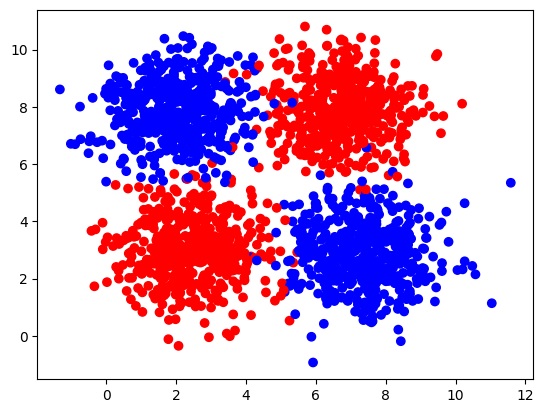

In [4]:
m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))

<a name='2.3'></a>
### 2.3 - Define Activation Function

<a name='ex01'></a>
### Exercise 1

Define sigmoid activation function $\sigma\left(z\right) =\frac{1}{1+e^{-z}} $.

In [5]:
def sigmoid(z):
    ### START CODE HERE ### (~ 1 line of code)
    res = 1/(1 + np.e**(-z))
    ### END CODE HERE ###
    
    return res

In [6]:
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211757
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


##### __Expected Output__

Note: the values may vary in the last decimal places.

```Python
sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436
```

In [7]:
w3_unittest.test_sigmoid(sigmoid)

 All tests passed


<a name='3'></a>
## 3 - Implementation of the Neural Network Model with Two Layers

<a name='3.1'></a>
### 3.1 - Defining the Neural Network Structure

<a name='ex02'></a>
### Exercise 2

Define three variables:
- `n_x`: the size of the input layer
- `n_h`: the size of the hidden layer (set it equal to 2 for now)
- `n_y`: the size of the output layer

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    Use shapes of X and Y to find n_x and n_y:
    <li>the size of the input layer n_x equals to the size of the input vectors placed in the columns of the array X,</li>
    <li>the outpus for each of the data point will be saved in the columns of the the array Y.</li>
</ul>
</p>

In [8]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (~ 3 lines of code)
    # Size of input layer.
    n_x = len(X)
    # Size of hidden layer.
    n_h = 2
    # Size of output layer.
    n_y = len(Y) 
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [9]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


##### __Expected Output__

```Python
The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1
```

In [10]:
w3_unittest.test_layer_sizes(layer_sizes)

 All tests passed


<a name='3.2'></a>
### 3.2 - Initialize the Model's Parameters

<a name='ex03'></a>
### Exercise 3

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrix with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vector as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [11]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


##### __Expected Output__ 
Note: the elements of the arrays W1 and W2 maybe be different due to random initialization. You can try to restart the kernel to get the same values.

```Python
W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]
```

In [13]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_initialize_parameters(initialize_parameters)

 All tests passed


<a name='3.3'></a>
### 3.3 - The Loop

<a name='ex04'></a>
### Exercise 4

Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation $(7)$ of your classifier (section [2.2](#2.2)):
\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right).\\
\end{align}
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute `Z1` multiplying matrices `W1`, `X` and adding vector `b1`. Then find `A1` using the `sigmoid` activation function. Perform similar computations for `Z2` and `A2`.

In [14]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- python dictionary containing Z1, A1, Z2, A2 
    (that simplifies the calculations in the back propagation step)
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement forward propagation to calculate A2.
    ### START CODE HERE ### (~ 4 lines of code)
    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [15]:
A2, cache = forward_propagation(X, parameters)

print(A2)

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


##### __Expected Output__ 
Note: the elements of the array A2 maybe be different depending on the initial parameters. If you would like to get exactly the same output, try to restart the Kernel and rerun the notebook.

```Python
[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]
```

In [16]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_forward_propagation(forward_propagation)

 All tests passed


Remember, that your weights were just initialized with some random values, so the model has not been trained yet. 

<a name='ex05'></a>
### Exercise 5

Define a cost function $(8)$ which will be used to train the model:

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [17]:
def compute_cost(A2, Y):
    """
    Computes the cost function as a log loss
    
    Arguments:
    A2 -- The output of the neural network of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- log loss
    
    """
    # Number of examples.
    m = Y.shape[1]
    
    ### START CODE HERE ### (~ 2 lines of code)
    logloss = 1/m * np.sum(-Y * np.log(A2) - (1-Y)*np.log(1-A2))
    cost = np.squeeze(logloss)
    ### END CODE HERE ###

    assert(isinstance(cost, float))
    
    return cost

In [18]:
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.6931477703826823


##### __Expected Output__ 
Note: the elements of the arrays W1 and W2 maybe be different!

```Python
cost = 0.6931477703826823
```

In [19]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_compute_cost(compute_cost, A2)

 All tests passed


Calculate partial derivatives as shown in $(15)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1}.\\
\end{align}

In [20]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate partial derivatives denoted as dW1, db1, dW2, db2 for simplicity. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-1.49856632e-05  1.67791519e-05]
 [-2.12394543e-05  2.43895135e-05]]
db1 = [[5.11207671e-07]
 [7.06236219e-07]]
dW2 = [[-0.00032641 -0.0002606 ]]
db2 = [[-0.00078732]]


<a name='ex06'></a>
### Exercise 6

Implement `update_parameters()`.

**Instructions**:
- Update parameters as shown in $(9)$ (section [2.3](#2.3)):
\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} }.\\
\end{align}
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Retrieve each derivative from the dictionary "grads" (which is the output of `backward_propagation()`) by using `grads[".."]`.
    3. Update parameters.

In [21]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads".
    ### START CODE HERE ### (~ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ### END CODE HERE ###
    
    # Update rule for each parameter.
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [22]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]


##### __Expected Output__ 
Note: the actual values can be different!

```Python
W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]
```

In [23]:
w3_unittest.test_update_parameters(update_parameters)

 All tests passed


<a name='3.4'></a>
### 3.4 - Integrate parts 3.1, 3.2 and 3.3 in nn_model()

<a name='ex07'></a>
### Exercise 7

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [24]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters.
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop.
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [25]:
parameters = nn_model(X, Y, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Cost after iteration 0: 0.693166
Cost after iteration 1: 0.693153
Cost after iteration 2: 0.693149
Cost after iteration 3: 0.693148
Cost after iteration 4: 0.693147
Cost after iteration 5: 0.693147
Cost after iteration 6: 0.693147
Cost after iteration 7: 0.693147
Cost after iteration 8: 0.693147
Cost after iteration 9: 0.693147
Cost after iteration 10: 0.693147
Cost after iteration 11: 0.693147
Cost after iteration 12: 0.693147
Cost after iteration 13: 0.693147
Cost after iteration 14: 0.693147
Cost after iteration 15: 0.693147
Cost after iteration 16: 0.693147
Cost after iteration 17: 0.693147
Cost after iteration 18: 0.693147
Cost after iteration 19: 0.693147
Cost after iteration 20: 0.693146
Cost after iteration 21: 0.693146
Cost after iteration 22: 0.693146
Cost after iteration 23: 0.693146
Cost after iteration 24: 0.693146
Cost after iteration 25: 0.693146
Cost after iteration 26: 0.693146
Cost after iteration 27: 0.693146
Cost after iteration 28: 0.693146
Cost after iteration 29:

##### __Expected Output__ 
Note: the actual values can be different!

```Python
Cost after iteration 0: 0.693148
Cost after iteration 1: 0.693147
Cost after iteration 2: 0.693147
Cost after iteration 3: 0.693147
Cost after iteration 4: 0.693147
Cost after iteration 5: 0.693147
...
Cost after iteration 2995: 0.209524
Cost after iteration 2996: 0.208025
Cost after iteration 2997: 0.210427
Cost after iteration 2998: 0.208929
Cost after iteration 2999: 0.211306
W1 = [[ 2.14274251 -1.93155541]
 [ 2.20268789 -2.1131799 ]]
b1 = [[-4.83079243]
 [ 6.2845223 ]]
W2 = [[-7.21370685  7.0898022 ]]
b2 = [[-3.48755239]]
```

In [26]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_nn_model(nn_model)

 All tests passed


The final model parameters can be used to find the boundary line and for making predictions. 

<a name='ex08'></a>
### Exercise 8

Computes probabilities using forward propagation, and make classification to 0/1 using 0.5 as the threshold.

In [27]:
# GRADED FUNCTION: predict

def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (blue: 0 / red: 1)
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [28]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]


##### __Expected Output__ 

```Python
Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]
```

In [29]:
w3_unittest.test_predict(predict)

 All tests passed


Let's visualize the boundary line. Do not worry if you don't understand the function `plot_decision_boundary` line by line - it simply makes prediction for some points on the plane and plots them as a contour plot (just two colors - blue and red).

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 2')

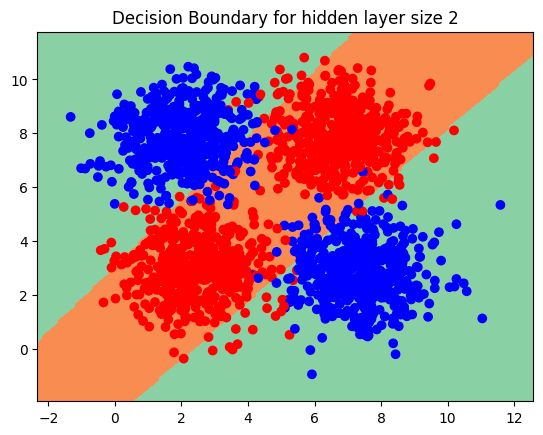

In [30]:
def plot_decision_boundary(predict, parameters, X, Y):
    # Define bounds of the domain.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Define the x and y scale.
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # Create all of the lines and rows of the grid.
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Flatten each grid to a vector.
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Vertical stack vectors to create x1,x2 input for the model.
    grid = np.vstack((r1,r2))
    # Make predictions for the grid.
    predictions = predict(grid, parameters)
    # Reshape the predictions back into a grid.
    zz = predictions.reshape(xx.shape)
    # Plot the grid of x, y and z values as a surface.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

# Plot the decision boundary.
plot_decision_boundary(predict, parameters, X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))

That's great, you can see that more complicated classification problems can be solved with two layer neural network!

<a name='4'></a>
## 4 - Optional: Other Dataset

Build a slightly different dataset:

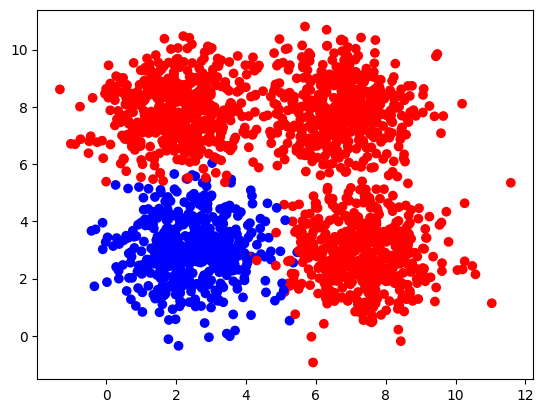

In [31]:
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));

Notice that when building your neural network, a number of the nodes in the hidden layer could be taken as a parameter. Try to change this parameter and investigate the results:

Text(0.5, 1.0, 'Decision Boundary')

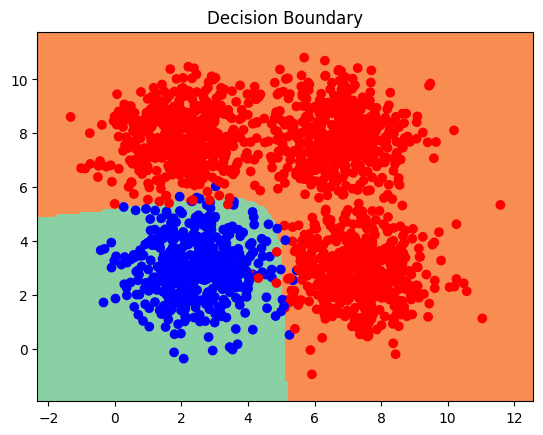

In [32]:
# parameters_2 = nn_model(X_2, Y_2, n_h=1, num_iterations=3000, learning_rate=1.2, print_cost=False)
parameters_2 = nn_model(X_2, Y_2, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=False)
# parameters_2 = nn_model(X_2, Y_2, n_h=15, num_iterations=3000, learning_rate=1.2, print_cost=False)

# This function will call predict function 
plot_decision_boundary(predict, parameters_2, X_2, Y_2)
plt.title("Decision Boundary")

You can see that there are some misclassified points - real-world datasets are usually linearly inseparable, and there will be a small percentage of errors. More than that, you do not want to build a model that fits too closely, almost exactly to a particular set of data - it may fail to predict future observations. This problem is known as **overfitting**.

Congrats on finishing this programming assignment!